In [27]:
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt
import torchvision.transforms as transforms
import numpy as np
from PIL import Image
import os, glob
os.environ['CUDA_VISIBLE_DEVICES'] = '0, 1'
from torch.autograd import Variable
from torchvision.datasets import ImageFolder
device = "cuda"

In [28]:
from_dir = "/export/data/yanai/img/ramen_sl"
files = glob.glob(os.path.join(from_dir,'*.jpg'))
print(Image.open(files[0]))

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=537x401 at 0x7F44B6FC6EF0>


In [29]:
class Mydatasets(torch.utils.data.Dataset):
    def __init__(self, folder, transform = None):
        self.transform = transform
        self.files = glob.glob(os.path.join(folder,'*.jpg'))
    def __len__(self):
        return 300#len(self.files)

    def __getitem__(self, idx):
        try:
            out_data = Image.open(self.files[idx])
            if self.transform:
                out_data = self.transform(out_data)
        
        except IOError:
            out_data = Image.open(self.files[0])
            if self.transform:
                out_data = self.transform(out_data)
        return out_data

In [30]:

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = Mydatasets(folder="/export/data/yanai/img/ramen", transform=transform)
#dataset = torchvision.datasets.MNIST(root="dataset",download=True)v


In [31]:
dataset[0]


tensor([[[0.2980, 0.2314, 0.2784,  ..., 0.3608, 0.3490, 0.3412],
         [0.2000, 0.1765, 0.2784,  ..., 0.3765, 0.3647, 0.3294],
         [0.0784, 0.0941, 0.2588,  ..., 0.4431, 0.3882, 0.2980],
         ...,
         [0.2510, 0.2235, 0.1765,  ..., 0.2235, 0.2275, 0.2314],
         [0.2824, 0.2275, 0.1765,  ..., 0.4039, 0.4471, 0.4510],
         [0.3882, 0.2588, 0.2000,  ..., 0.5020, 0.5529, 0.5647]],

        [[0.1059, 0.1098, 0.1137,  ..., 0.5059, 0.3765, 0.3451],
         [0.1020, 0.0863, 0.1059,  ..., 0.4745, 0.3804, 0.3647],
         [0.0627, 0.0510, 0.0902,  ..., 0.4784, 0.4039, 0.3529],
         ...,
         [0.1059, 0.0980, 0.0863,  ..., 0.1333, 0.1294, 0.1255],
         [0.1412, 0.1098, 0.0902,  ..., 0.3451, 0.3647, 0.3608],
         [0.2039, 0.1294, 0.1020,  ..., 0.4863, 0.5255, 0.5216]],

        [[0.0549, 0.0667, 0.0627,  ..., 0.3961, 0.3216, 0.3098],
         [0.0627, 0.0510, 0.0549,  ..., 0.3765, 0.3333, 0.2941],
         [0.0471, 0.0314, 0.0392,  ..., 0.4078, 0.3451, 0.

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()        
        self.main = nn.Sequential(

            nn.ConvTranspose2d(100, 256, 4, 1, 0, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.1),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.1),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1),

            nn.ConvTranspose2d(64, 32, 4, 2, 1, bias=False),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.1),

            nn.ConvTranspose2d(32, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )
    def forward(self, x):
        return self.main(x)

In [ ]:
g = Generator()
t=Variable(torch.zeros((1,100,1,1)))
fake = g(t)
print(fake.shape)

In [34]:

from torch.nn.utils.spectral_norm import spectral_norm
class Flatten(nn.Module):
    def forward(self,x):
        return x.view(x.shape[0], -1)
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()        
        self.main = nn.Sequential(
            spectral_norm(nn.Conv2d(3, 64, stride=2, kernel_size=3, padding=True)),
            nn.LeakyReLU(0.1),
            spectral_norm(nn.Conv2d(64, 128, stride=2, kernel_size=3, padding=True)),
            nn.LeakyReLU(0.1),
            spectral_norm(nn.Conv2d(256, 512, stride=2, kernel_size=3, padding=True)),
            nn.ReLU(),
            spectral_norm(nn.Conv2d(512, 1, stride=2, kernel_size=3, padding=True)),
            nn.ReLU(),
            
        )
    def forward(self, x):
        return self.main(x)
#d=Discriminator()
#out = d(fake)
#lossfunc = nn.CrossEntropyLoss()
#lossfunc = nn.BCEWithLogitsLoss()
lossfunc = nn.HingeEmbeddingLoss()
#loss = lossfunc(out, Variable(torch.zeros((1),dtype=torch.long)))
#loss.backward()

tensor(-0.0140, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.4964, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


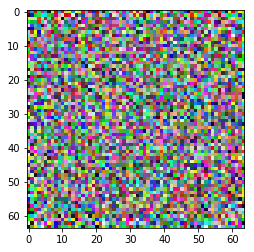

tensor(-1.0000, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.0004, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


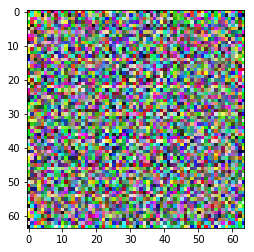

tensor(-1.0000, device='cuda:0', grad_fn=<MeanBackward0>) tensor(2.3842e-06, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


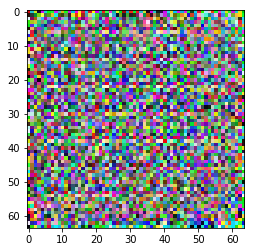

tensor(-1.0000, device='cuda:0', grad_fn=<MeanBackward0>) tensor(5.1856e-06, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


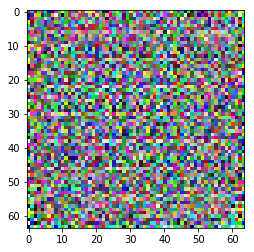

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(2.6524e-06, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


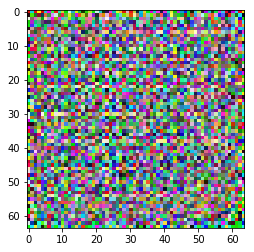

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(2.9802e-08, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


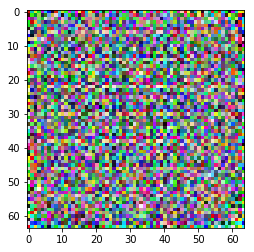

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(2.4438e-06, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


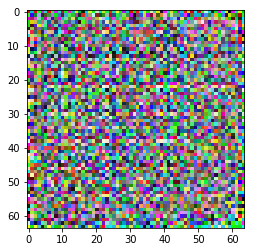

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(2.9802e-08, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


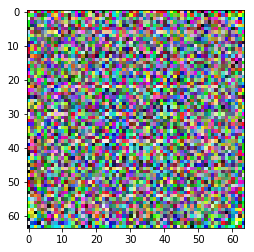

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(1.1921e-07, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


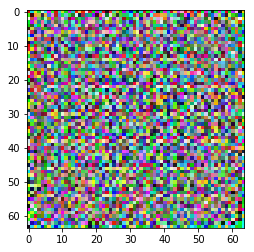

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(2.9802e-08, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


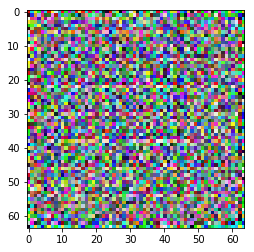

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(5.9605e-08, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


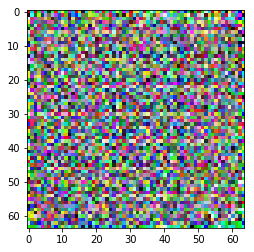

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(5.3644e-07, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


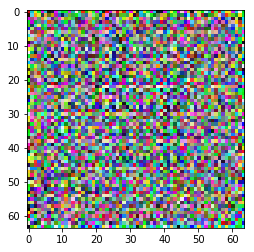

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(2.9802e-08, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


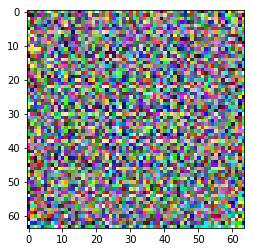

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(8.9407e-08, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


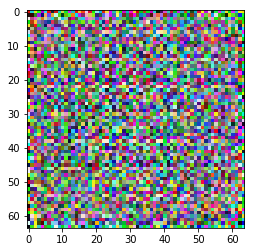

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(1.7881e-06, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


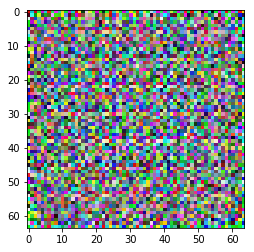

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


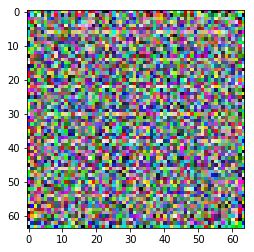

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


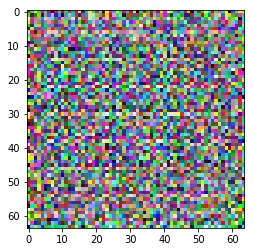

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(2.9802e-08, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


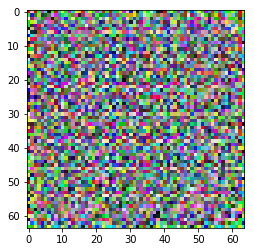

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


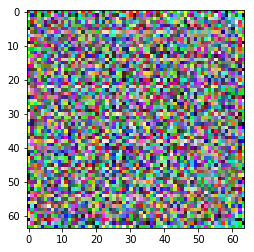

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


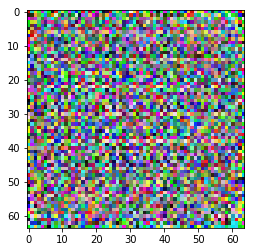

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


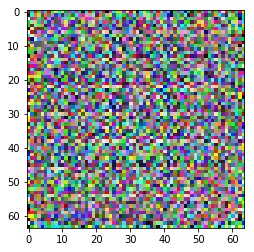

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


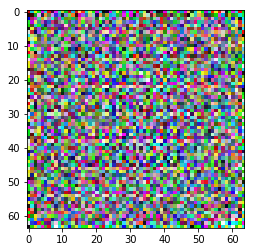

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(2.9802e-08, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


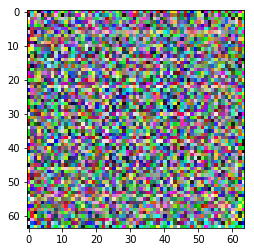

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


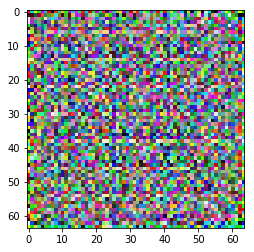

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(5.9605e-08, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


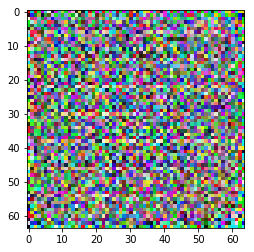

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


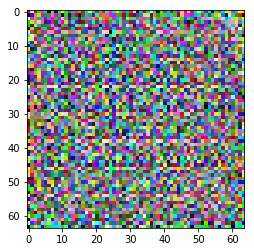

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


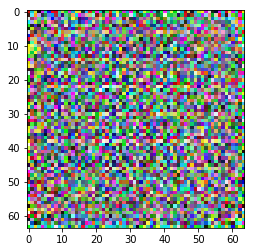

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


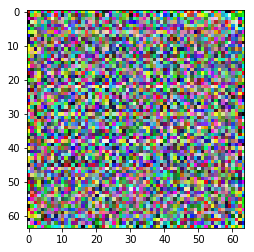

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


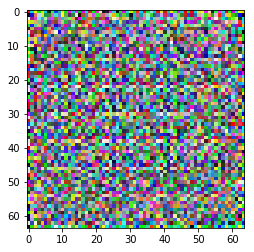

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


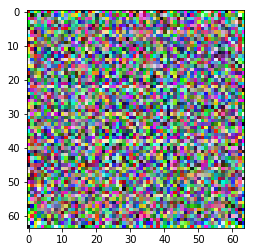

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(2.9802e-08, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


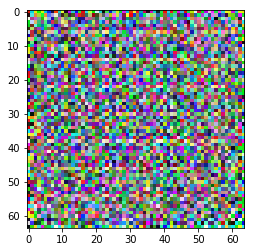

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


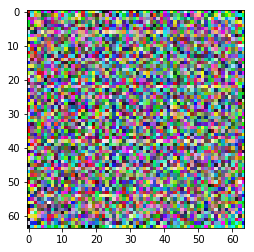

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


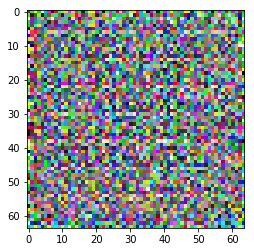

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


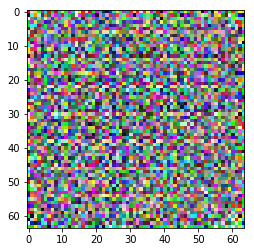

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


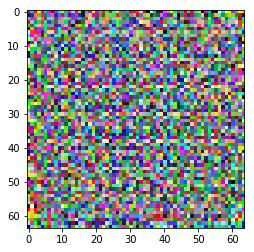

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


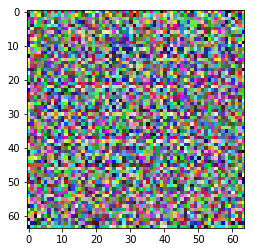

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


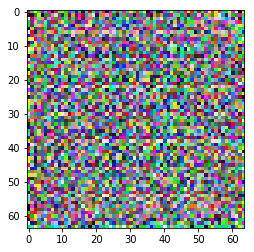

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


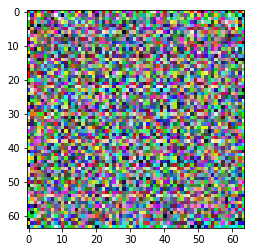

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


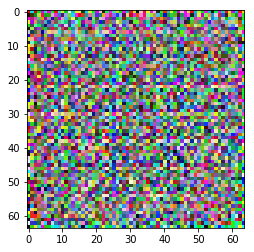

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


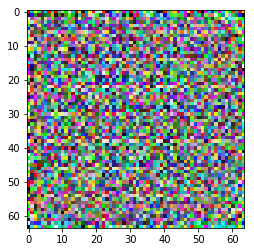

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


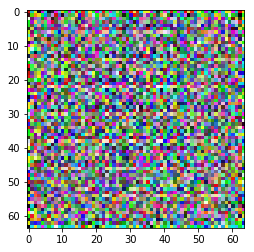

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


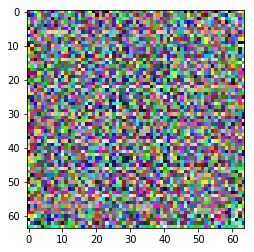

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


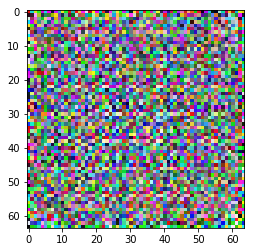

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


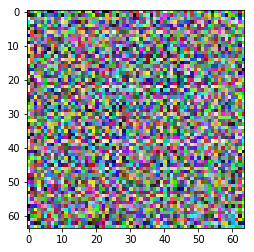

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


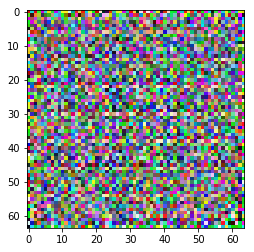

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


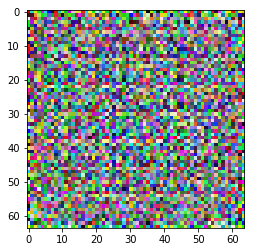

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


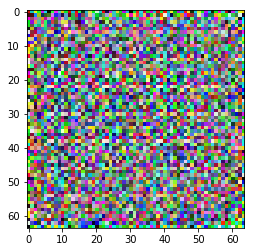

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


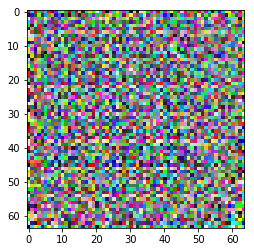

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(5.9605e-08, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


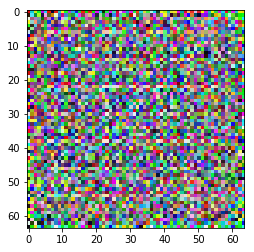

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


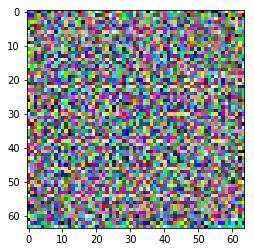

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


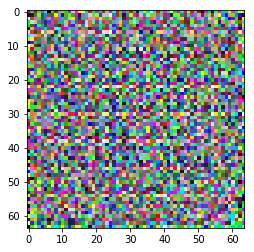

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


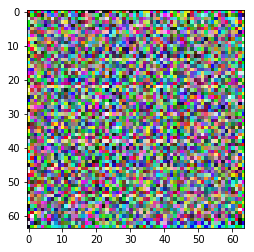

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


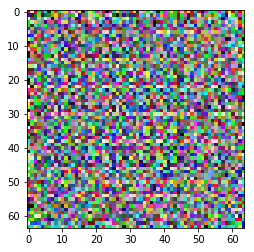

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


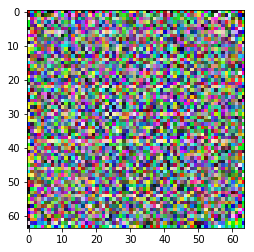

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


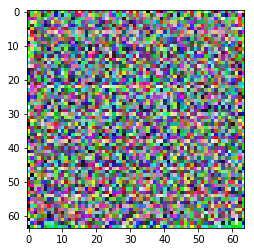

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


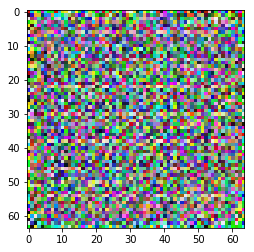

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


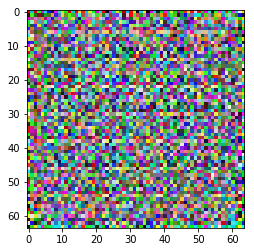

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


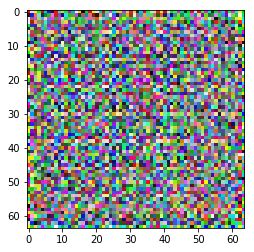

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


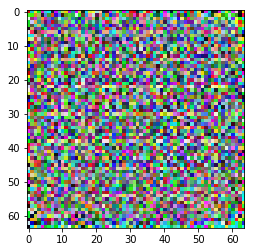

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(2.9802e-08, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


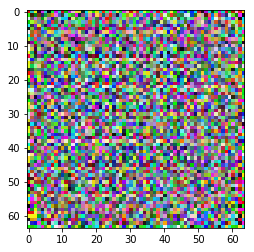

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


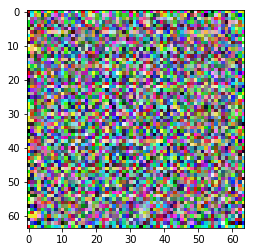

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


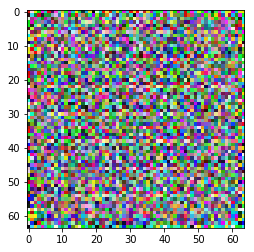

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


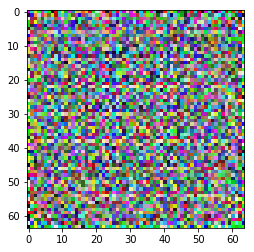

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


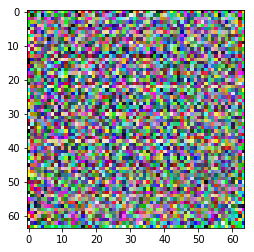

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


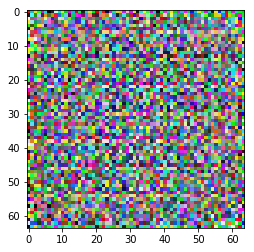

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


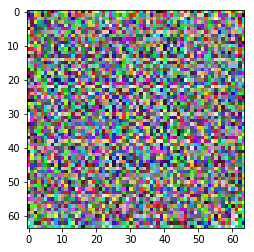

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


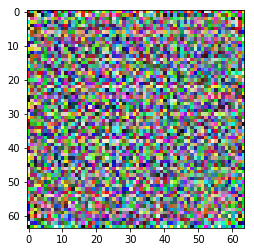

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


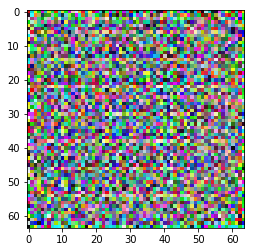

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


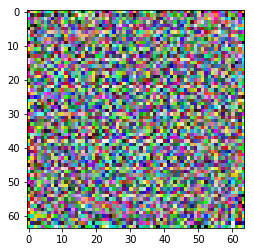

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


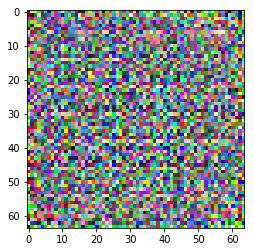

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


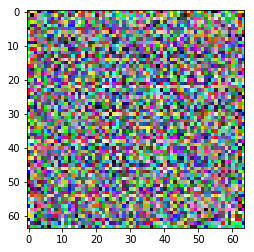

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


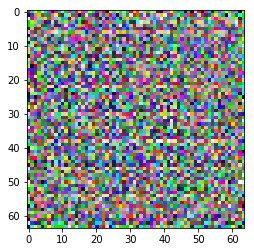

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


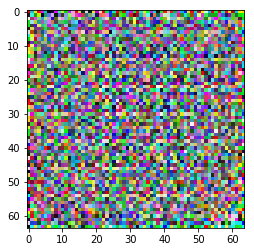

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


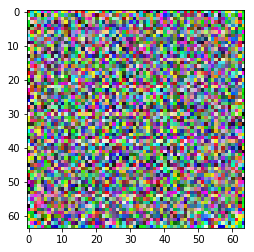

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


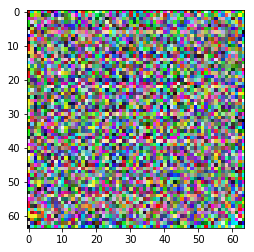

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


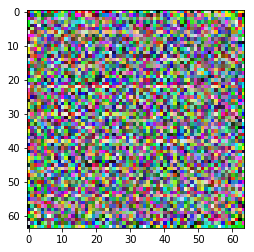

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


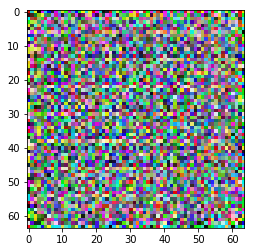

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


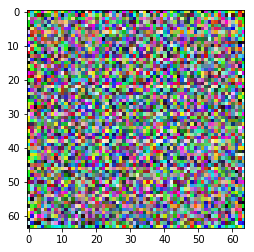

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


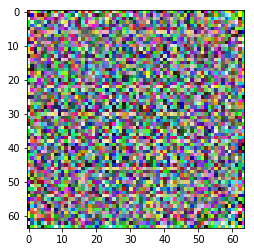

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


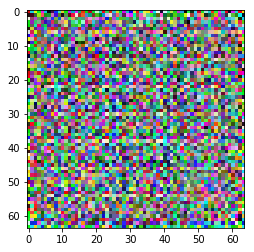

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


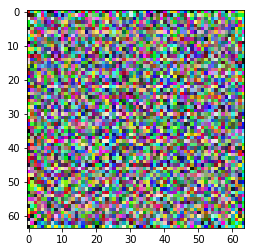

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


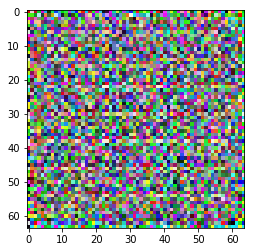

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


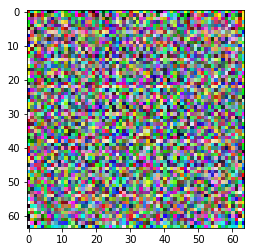

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


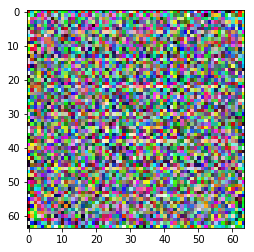

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(8.9407e-08, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


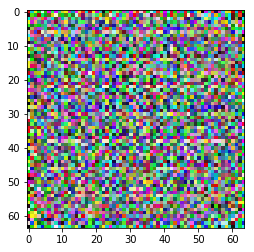

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


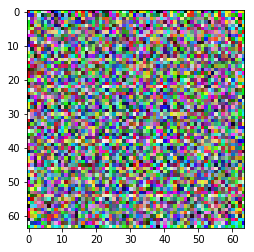

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


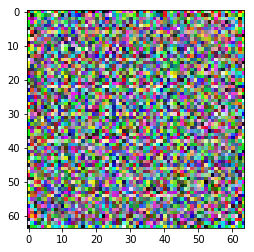

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(2.9802e-08, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


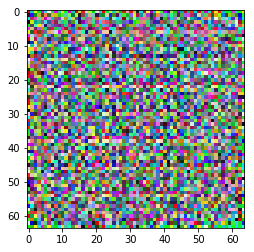

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


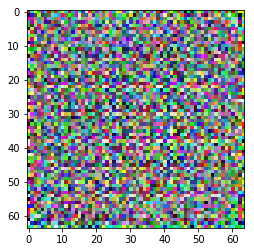

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


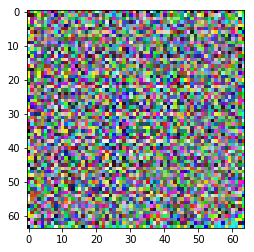

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


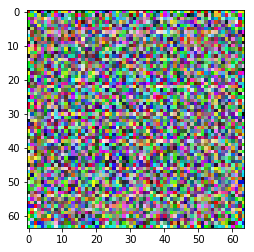

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


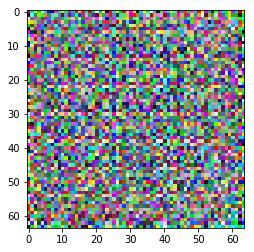

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


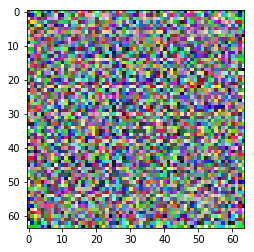

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


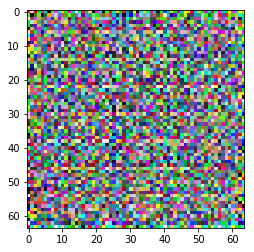

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


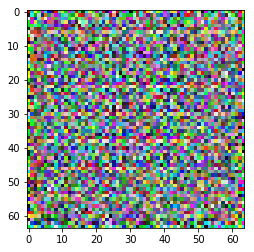

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


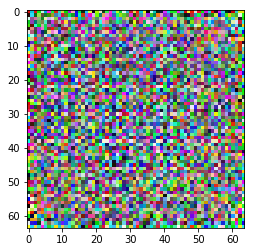

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


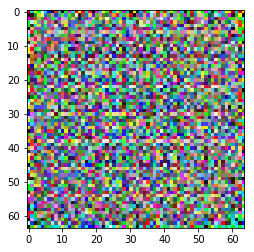

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


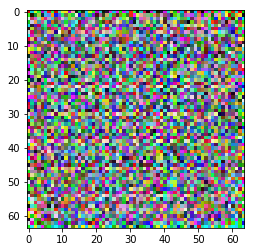

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


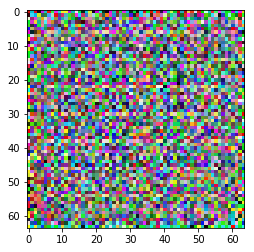

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


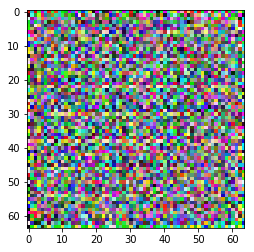

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


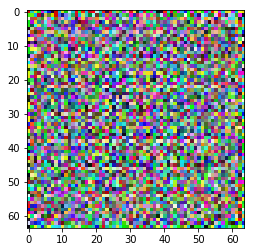

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


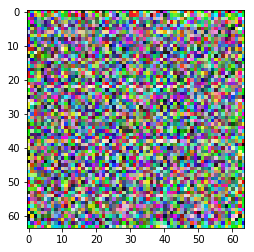

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


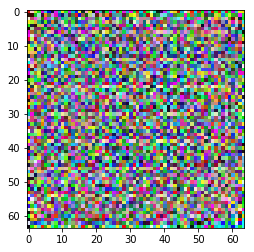

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


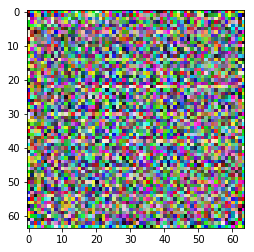

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(8.9407e-08, device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


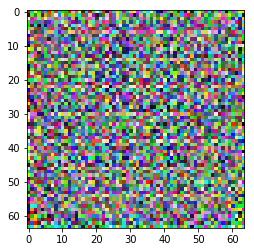

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


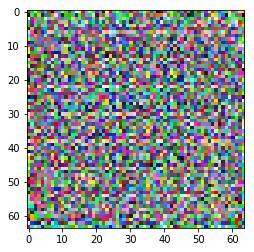

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


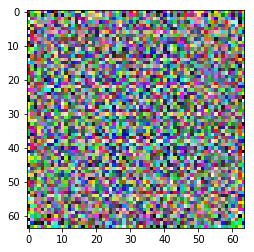

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


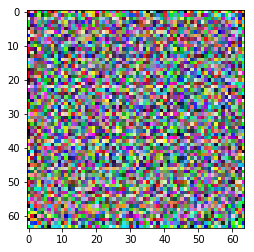

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


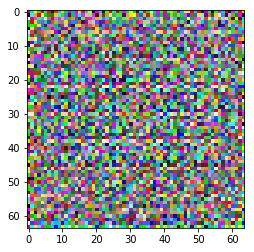

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


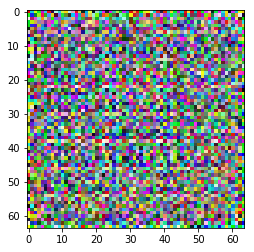

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


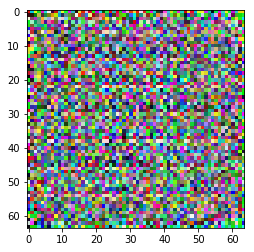

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


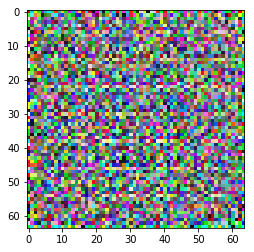

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


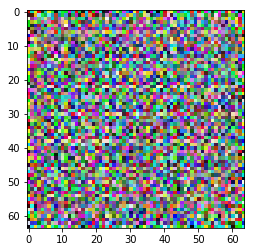

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


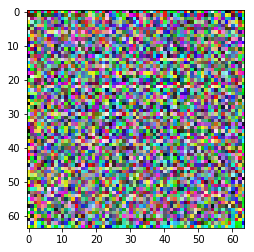

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


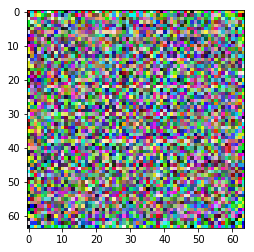

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


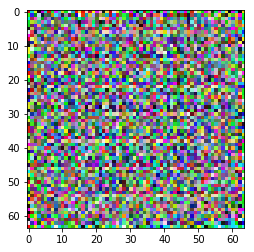

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


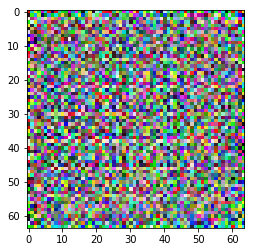

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


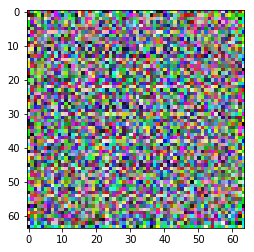

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


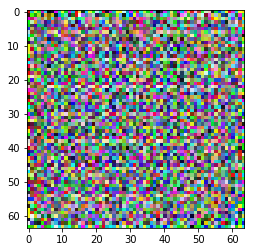

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


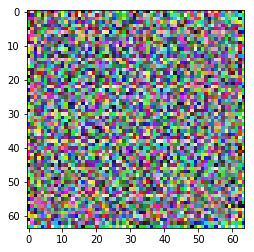

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


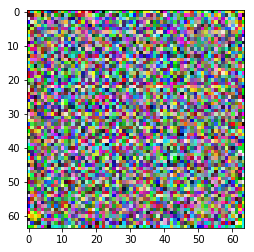

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


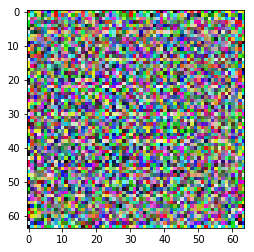

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


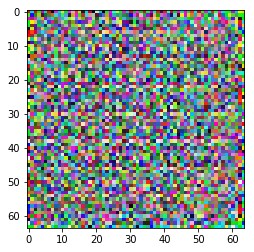

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


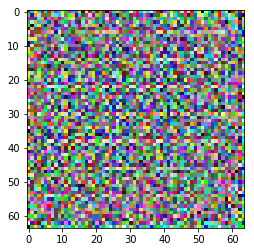

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


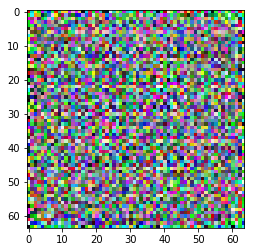

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


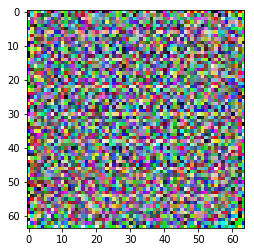

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


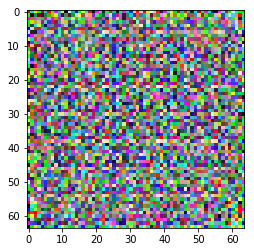

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


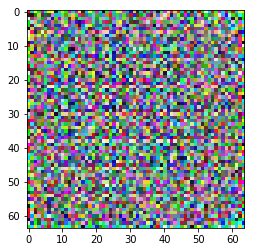

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


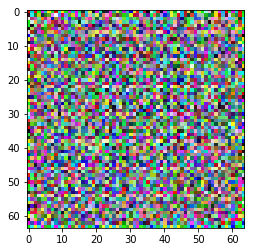

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


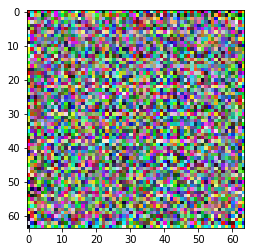

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


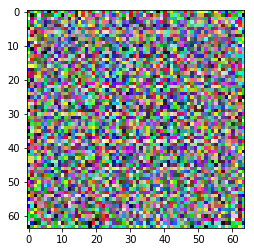

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


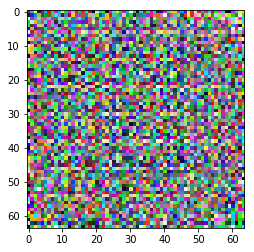

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


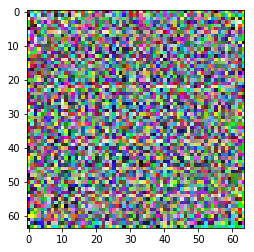

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


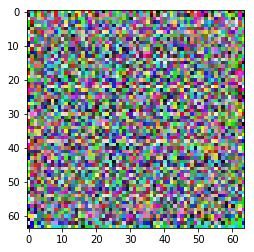

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


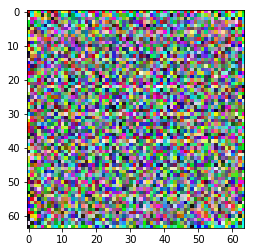

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


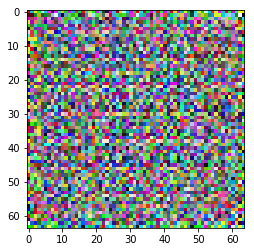

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


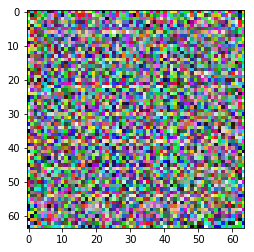

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


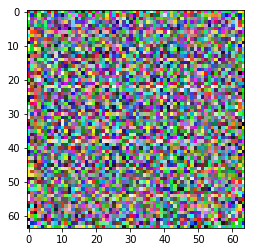

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


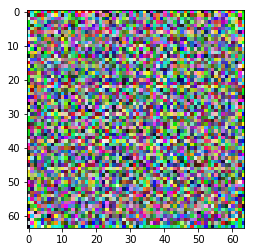

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


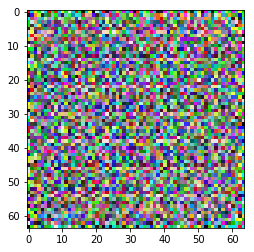

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


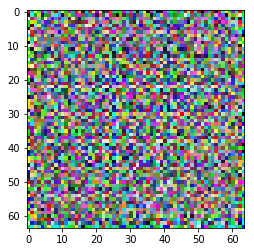

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


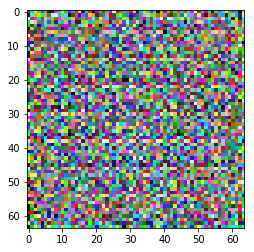

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


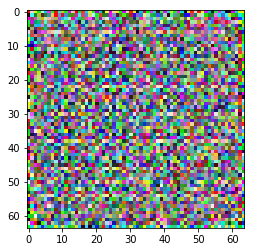

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


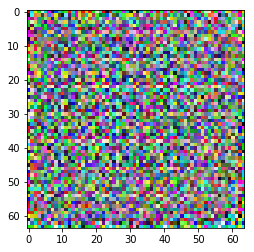

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


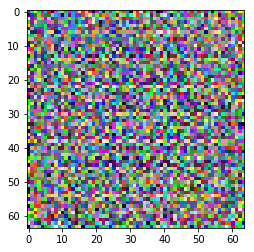

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


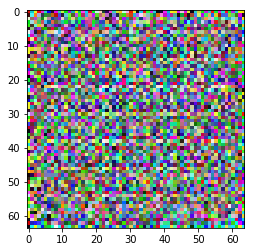

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


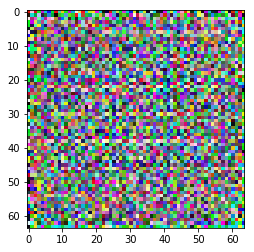

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


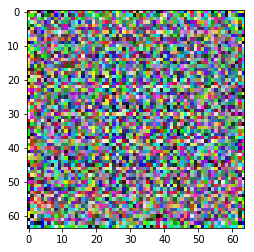

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


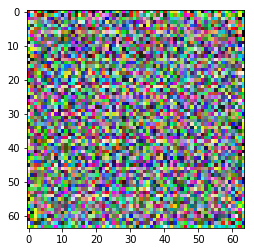

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


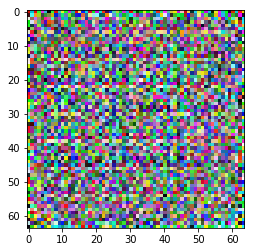

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


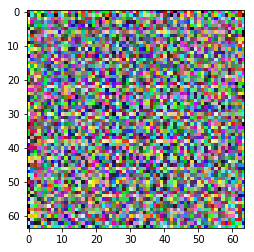

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


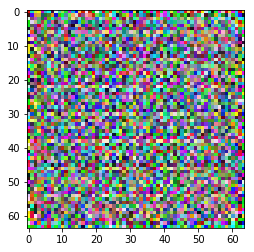

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


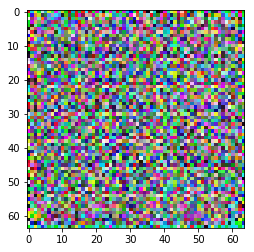

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


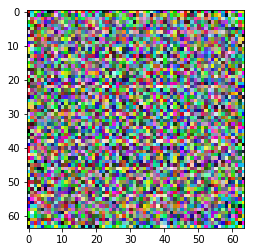

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


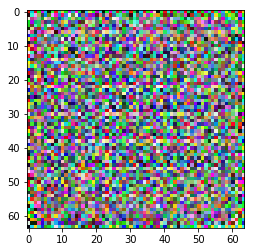

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


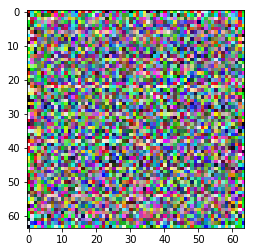

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


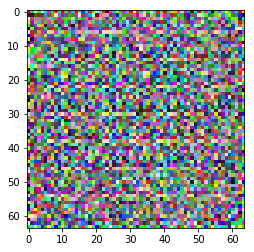

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


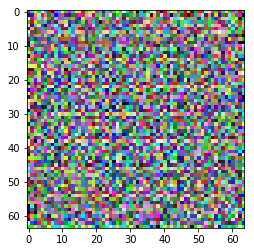

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


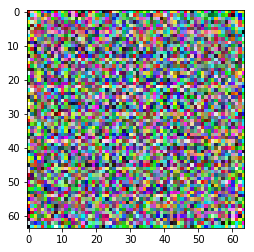

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


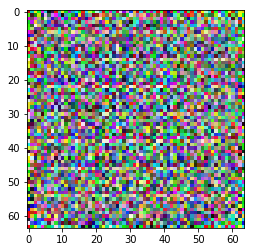

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


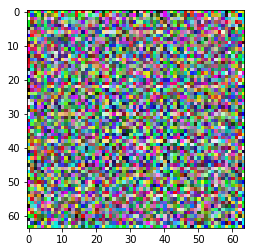

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


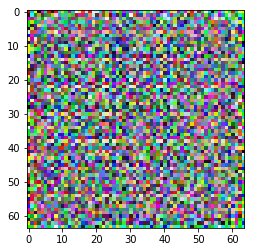

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


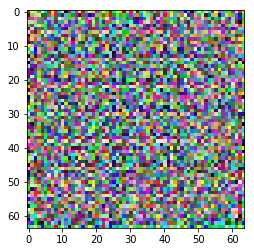

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


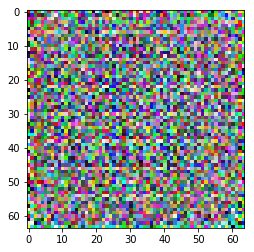

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


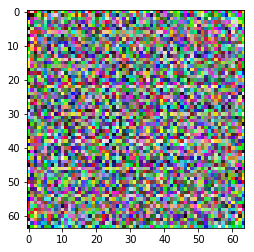

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


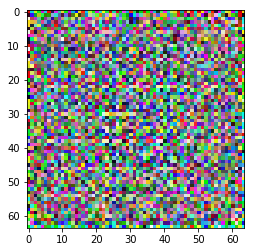

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


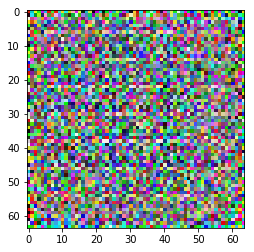

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


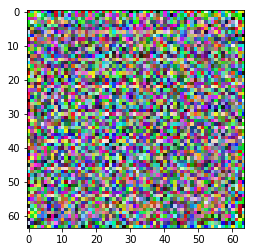

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


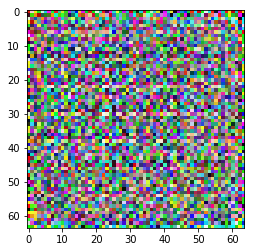

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


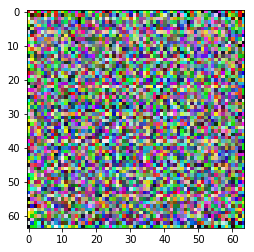

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


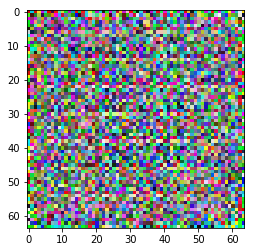

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


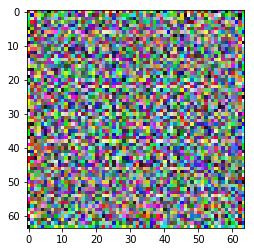

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


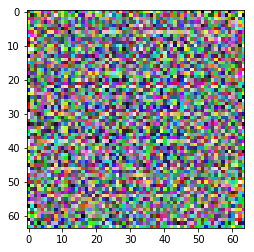

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


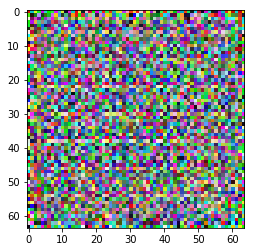

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


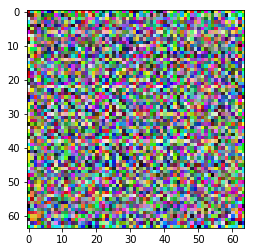

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


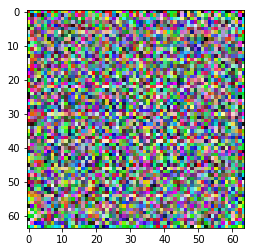

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


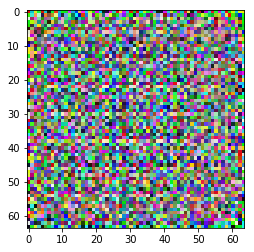

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


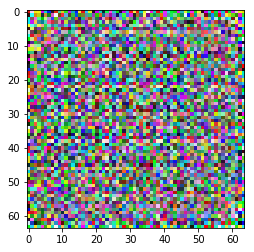

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


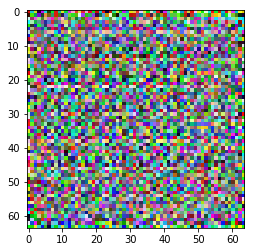

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


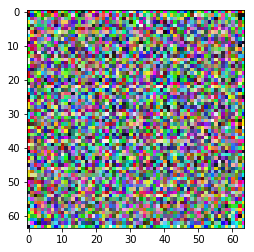

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


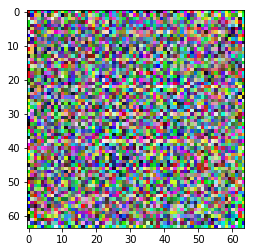

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


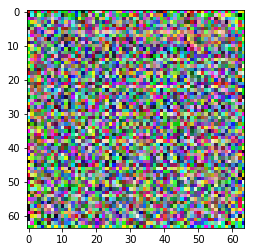

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


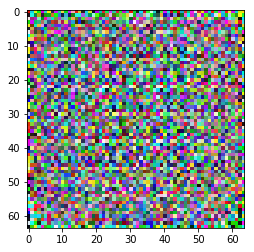

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


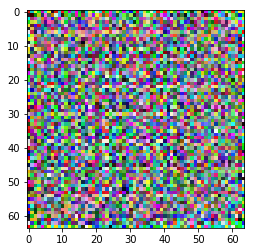

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


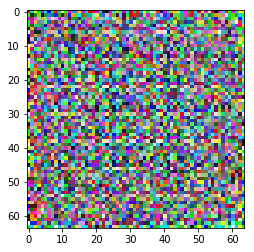

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


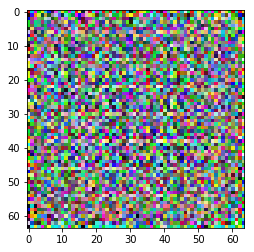

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


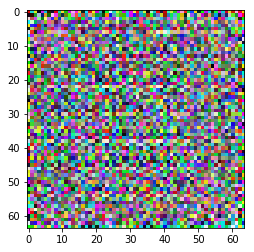

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


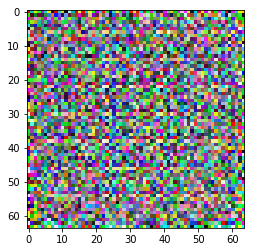

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


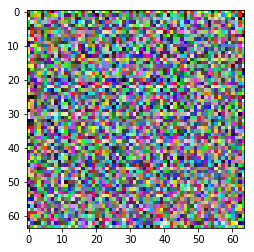

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


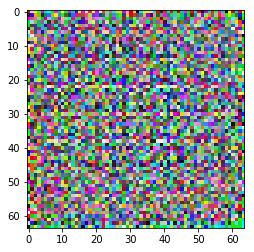

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


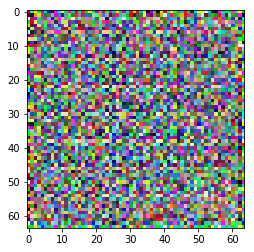

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


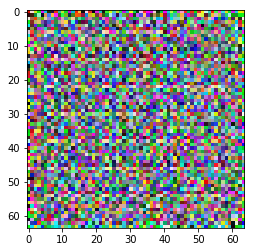

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


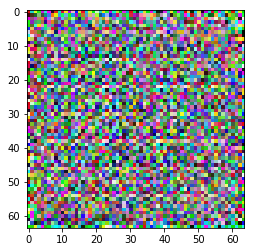

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


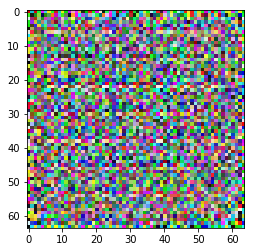

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


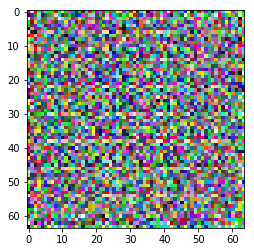

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


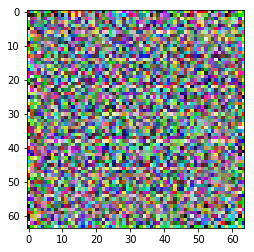

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


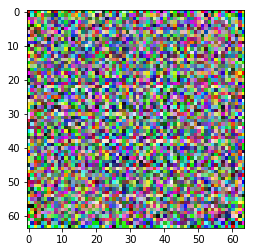

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


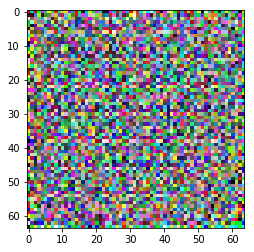

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


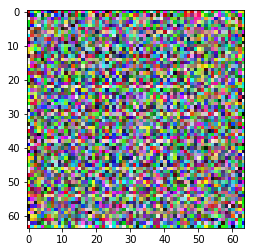

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


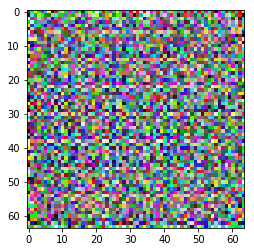

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


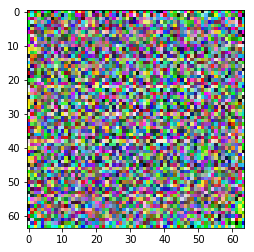

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


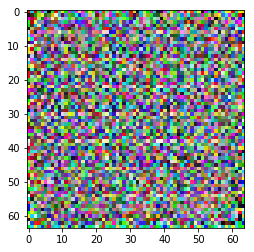

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


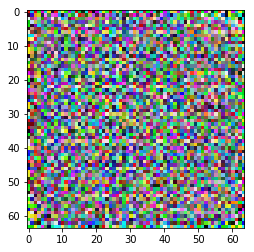

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


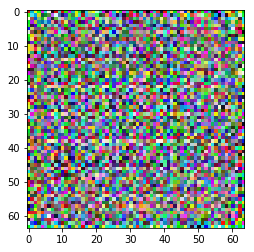

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


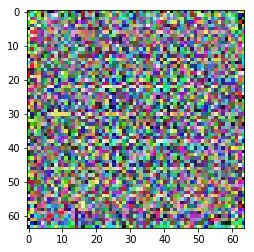

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


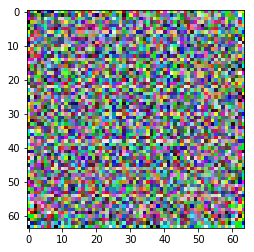

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


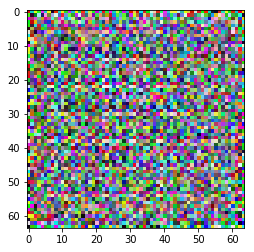

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


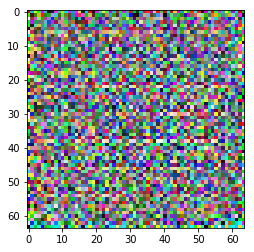

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


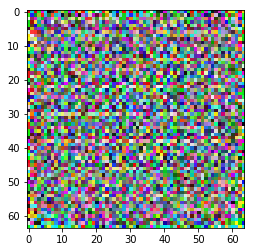

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


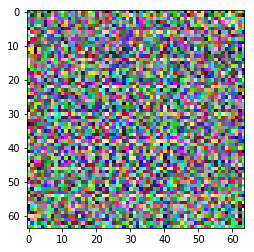

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


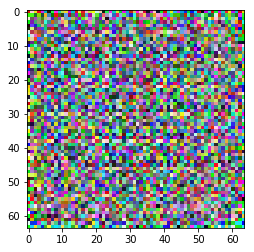

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


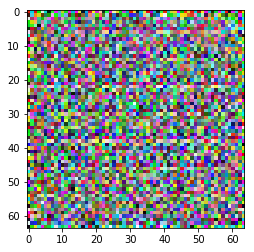

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


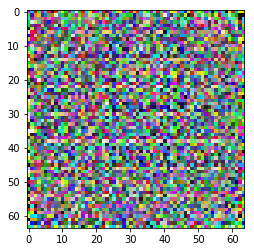

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


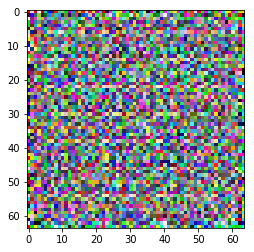

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


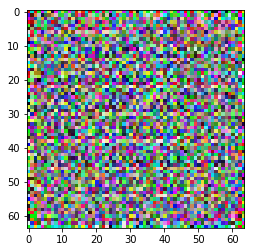

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


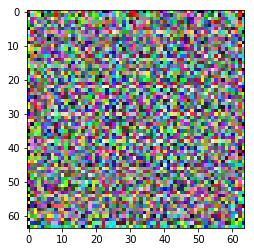

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


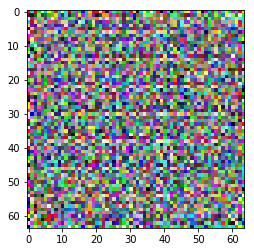

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


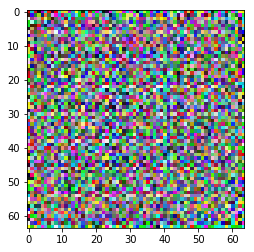

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


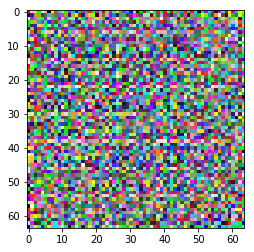

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


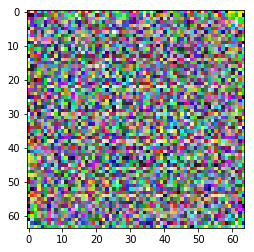

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


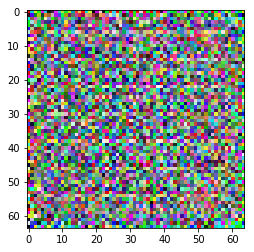

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


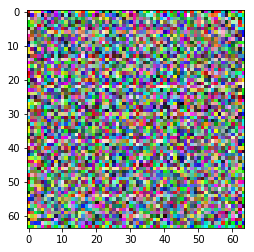

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


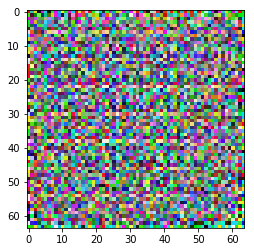

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


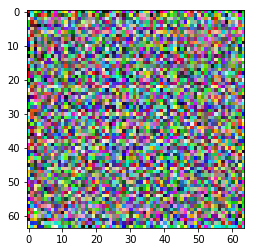

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


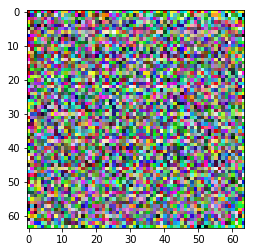

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


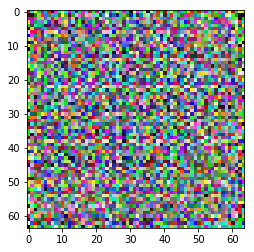

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


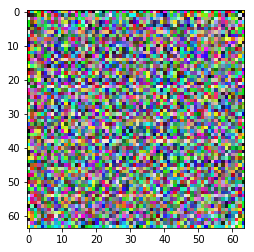

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


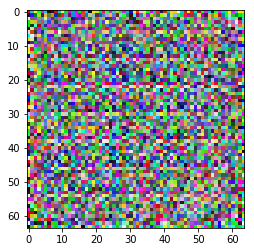

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


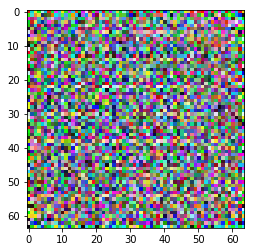

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


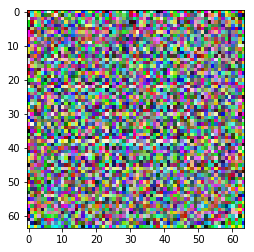

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


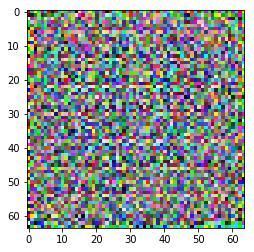

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


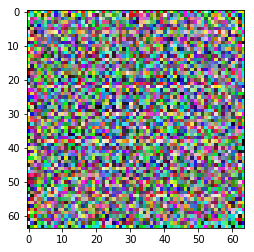

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


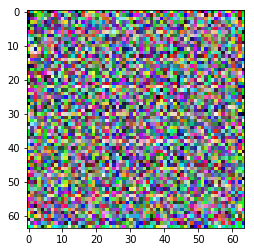

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


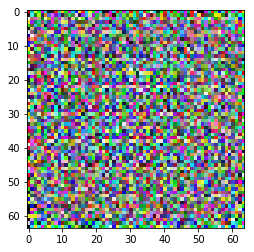

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


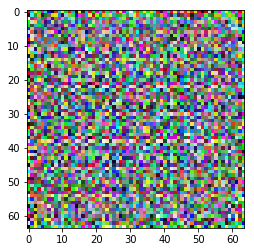

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


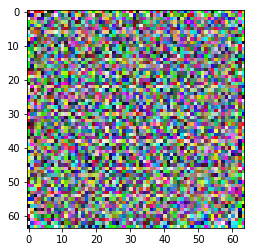

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


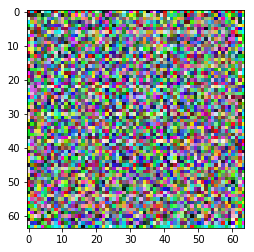

tensor(-1., device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<DivBackward0>)
torch.Size([1, 3, 64, 64])


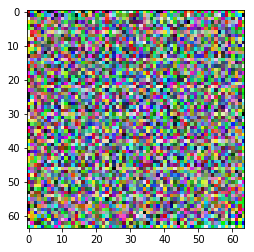

In [ ]:
import matplotlib.pyplot as plt
d=Discriminator()
g=Generator()
#d_opt = opt.Adam(params=d.parameters())#
g_opt = opt.Adam(g.parameters(),lr=0.0002, betas=(0.5, 0.999))
d_opt = opt.Adam(d.parameters(),lr=0.0002, betas=(0.5, 0.999))
device = "cuda"
d.to(device)
g.to(device)
batch_size=1
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
a=torch.ones((batch_size),dtype=torch.long).to(device)
b=torch.zeros((batch_size),dtype=torch.long).to(device)
#a=torch.cat((aa,bb),axis=1)
#b=torch.cat((bb,aa),axis=1)
for ep in range(100):
    for (real,i) in zip(dataloader,range(len(dataloader))):
        if(real.shape[0] != batch_size):
            continue
        real = Variable(real.to(device))
        fake = g(Variable(torch.randn((batch_size,100,1,1))).to(device))
        g_opt.step()
        g_loss = lossfunc(d(fake),a)
        g_opt.zero_grad()
        g_loss.backward()
        
        
        d_opt.zero_grad()
        #fake = g(Variable(torch.randn((batch_size,100,1,1))).to(device))
        d_loss = (lossfunc(d(real),a) + lossfunc(d(Variable(fake.detach())),b))/2
        d_loss.backward()
        d_opt.step()
        if i % 100 == 0:
            print(g_loss,d_loss)
            trans = transforms.ToPILImage(mode='RGB')
            print(fake.shape)
            plt.imshow(np.array(trans(fake.to("cpu")[0].squeeze())))
            plt.show()
    